<a href="https://colab.research.google.com/github/arianeselli/biblioteca-python/blob/main/An%C3%A1lise_de_Similaridade_entre_%C3%82ngulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

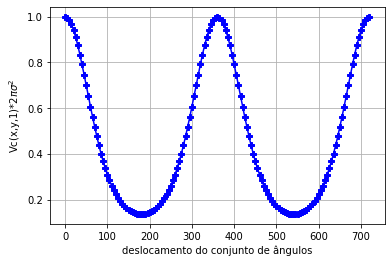

In [1]:
# Importando bibliotecas

import random
import cmath
import numpy as np
import matplotlib.pyplot as plt
import math

# Funções da biblioteca

def pontos_aleatorios(quant_pontos, media, desvio_padrao):
  conjunto_angulos_1 = desvio_padrao * np.random.randn(quant_pontos) 
  + media
  return conjunto_angulos_1

def adequar_angulos(lista_angulos):  
  nova_lista = lista_angulos.copy()
  i = 0
  N = len(lista_angulos)
  while(i<N):
    aux = lista_angulos[i]
    nova_lista[i] = aux%360
    i = i+1
  return nova_lista

def grau_para_complexo(lista_angulos):
  lista_numerosComplexos = []
  for x in lista_angulos:
     lista_numerosComplexos.append( math.cos(math.radians(x)) 
     + math.sin(math.radians(x))*(cmath.sqrt(-1)))

  return lista_numerosComplexos

def correntropiaComplexa(x, y, sigma):
  N = len(x)
  cte = 1/((2*math.pi)*sigma**2)
  i=0
  somatorio = 0
  while i<N:
    c = (x[i] - y[i])
    aux = -  (c*c.conjugate())/(2*sigma**2)   
    somatorio = somatorio + cmath.exp(aux)
    i = i+1
  return cte*((1/N)*somatorio).real


# Rotina de teste
angulos = pontos_aleatorios(100,0,0.1)

deslocamentos =  np.arange(0, 725, 5)
correntropiacomplexa_i = []
sigma = 1

for deslocamento in deslocamentos:
  angulos = adequar_angulos(angulos)
  angulos_deslocados = adequar_angulos([x + deslocamento for x 
                                        in angulos])   

  x = grau_para_complexo(angulos)
  y = grau_para_complexo(angulos_deslocados)
  
  correntropiacomplexa_i.append(correntropiaComplexa(x,y,sigma)
  *(2*math.pi)*(sigma**2) )

plt.xlabel('deslocamento do conjunto de ângulos')
plt.ylabel('Vc(x,y,1)*2$\pi \sigma^2 $')
plt.plot(deslocamentos,correntropiacomplexa_i, "-bP")
plt.grid()